<a href="https://colab.research.google.com/github/dtabuena/Workshop/blob/main/analyze_gluc_trace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install openpyxl
!pip install XlsxWriter
# !pip install pingouin
# !pip install CMH
# !pip install svgutils


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 kB 3.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=778f9994360f9ba3d8385f5c4792c3fd798d0549b0b2b5f0805c5f2abe466016
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import tifffile
import numpy as np
from google import colab
from matplotlib import pyplot as plt
import scipy
from tqdm import tqdm
import matplotlib as mpl
import pandas as pd

In [4]:
def get_drobox_file(new_filename, link):
    !wget -O $new_filename $link
    return new_filename


In [20]:
link = 'https://www.dropbox.com/sh/yojyzw9daxnnk12/AAA_Gpm5U_fZWtcvhyZwvLoIa?dl=1'
new_filename = 'data.xlsx'
get_drobox_file(new_filename, link)

--2023-05-24 22:01:03--  https://www.dropbox.com/sh/yojyzw9daxnnk12/AAA_Gpm5U_fZWtcvhyZwvLoIa?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/dl/yojyzw9daxnnk12/AAA_Gpm5U_fZWtcvhyZwvLoIa [following]
--2023-05-24 22:01:03--  https://www.dropbox.com/sh/dl/yojyzw9daxnnk12/AAA_Gpm5U_fZWtcvhyZwvLoIa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd8988707ef179c1d2e508f855b.dl.dropboxusercontent.com/zip_download_get/BgGFgQkOCahHnKCDcZiEJ6yPe6Ah8RUH8YYPGbgeOcCtsP5umnNztJ6I9lXFnAxRcO9N_IhEatqb2dRW5QyxFU1vxGhFi1haV81q1Kxi_9AEZQ?dl=1# [following]
--2023-05-24 22:01:04--  https://ucd8988707ef179c1d2e508f855b.dl.dropboxusercontent.com/zip_download_get/BgGFgQkOCahHnKCDcZiEJ6yPe6Ah8RUH8YYPGbgeOcCtsP5umnNztJ6I9lXFnAxRcO9N_IhEatqb2dRW5QyxFU1vx

'data.xlsx'

In [17]:
!pip install openpyxl
!pip install XlsxWriter
# /content/data.xlsx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


NameError: ignored

In [32]:
v.columns

MultiIndex([('Unnamed: 0_level_0', 'Unnamed: 0_level_1', ...),
            (           'Control',               '10Hz', ...),
            (           'Control',               '10Hz', ...),
            (           'Control',               '10Hz', ...),
            (           'Control',               '10Hz', ...),
            (           'Control',               '10Hz', ...)],
           )

In [68]:
my_df_dict  = pd.read_excel('/content/Glucose data May2023.xlsx',engine='openpyxl',header=[0,1,2,3],index_col=None,sheet_name=None) 

for k,v in my_df_dict.items():
    v=v.drop(0,axis=0)
    for c in v.columns:
        if v[c].isnull().all():
            v=v.drop(c,axis=1)
    my_df_dict[k]=v

In [73]:
for k,v in my_df_dict.items():
    # df_time
    my_df_dict[k]={'values':v,'time':df_time}

MultiIndex([('Control', '10Hz',   'Integrals',                 'LFP'),
            ('Control', '10Hz',   'Integrals',            'PopSpike'),
            ('Control', '10Hz', 'fEPSP slope',  'Unnamed: 3_level_3'),
            ('Control', '10Hz',     'Glucose',                'Soma'),
            ('Control', '10Hz',     'Glucose',           'Dendrites'),
            ('Control',  '5Hz',   'Integrals',                 'LFP'),
            ('Control',  '5Hz',   'Integrals',            'PopSpike'),
            ('Control',  '5Hz', 'fEPSP slope',  'Unnamed: 9_level_3'),
            ('Control',  '5Hz',     'Glucose',                'Soma'),
            ('Control',  '5Hz',     'Glucose',           'Dendrites'),
            (    'PMA', '10Hz',   'Integrals',                 'LFP'),
            (    'PMA', '10Hz',   'Integrals',            'PopSpike'),
            (    'PMA', '10Hz', 'fEPSP slope', 'Unnamed: 15_level_3'),
            (    'PMA', '10Hz',     'Glucose',                'Soma'),
      

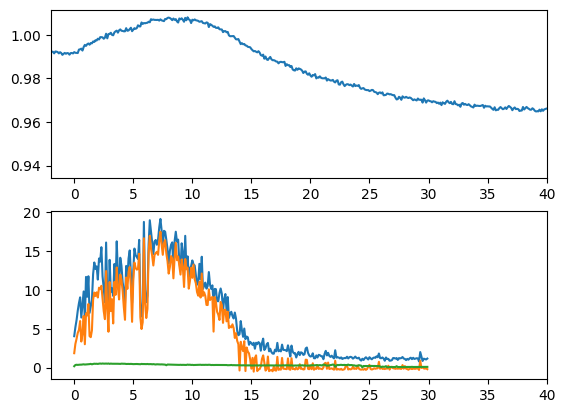

In [163]:
fig, ax =plt.subplots(2)


df_time = v.copy()
basic_offset = -3.75
for c in v.columns:
    freq = int(c[1].replace('Hz',""))
    'Base Pclamp Timing'
    if 'LFP' in c[3] or 'PopSpike' in c[3] or 'fEPSP slope' in c[2]:
        pulse_t_ind = np.arange(np.sum(v[c].notnull()))

        pulse_t = pulse_t_ind.astype('float') * 1/freq
        for i in pulse_t_ind:
            df_time.at[i+1,c] = pulse_t[i]
    

    'Syncronize Camera'
    if 'Glucose' in c[2]:
        df_time[c] = pd.Series((np.arange(len(v[c])))/10)

        y = np.array(v[c])
        y=(y-np.mean(y))/np.std(y) < -15
        pulse_ind = np.where(y)[0]
        y_t = df_time[c][pulse_ind]
        pulse_time = np.mean(y_t)
        df_time[c] = pd.Series((np.arange(len(v[c])))/10) - pulse_time + basic_offset

# df_time.head()
    if '10Hz' in c[1] and 'Control' in c[0]:
        if 'LFP' in c[3] or 'PopSpike' in c[3] or 'fEPSP slope' in c[2]:        
            ax[1].plot( df_time[c],v[c])
        if 'Soma' in c[3]:
            y=v[c]
            t = df_time[c]
            pt = t>-2
            y = y/y[100]
            ax[0].plot( t[pt],y[pt])
        for a in ax: a.set_xlim(-2,40)

Control                                                                \
        10Hz                                                           5Hz   
   Integrals                  fEPSP slope    Glucose             Integrals   
         LFP  PopSpike Unnamed: 3_level_3       Soma  Dendrites        LFP   
1   7.719096  0.520200           0.291333  1602.1281  1218.2390   7.844218   
2   8.126197  0.759657           0.448142  1602.1281  1218.2390   9.295015   
3   8.466616  1.079724           0.479332  1601.7889  1218.1270   9.357685   
4   8.412243  1.030680           0.450637  1601.1920  1217.6300   8.670699   
5   8.592537  1.116382           0.476008  1602.7820  1217.6880   9.633049   
6   9.193657  1.239971           0.485308  1603.5900  1218.8320   9.794055   
7   9.800847  1.580557           0.494551  1602.8750  1218.8540   9.800318   
8   9.302090  1.446321           0.499669  1602.8910  1217.7570   9.783010   
9   9.204688  1.374507           0.501532  1600.5630  1216.4990   9.829114   
10  9.452880  1.424953           0.513144  1600.1650  1216.9380  10.338199   
11  9.229185  1.319927           0.524422  1602.8450  1216.9771  10.350103   
12  9.759068  1.634102           0.526540  1602.9310  1217.7750   9.473928   
13  8.929471  1.199491           0.516039  1602.6520  1218.4399   9.073593   
14  8.896009  1.473525           0.524879  1601.2800  1217.5040   9.453809   
15  9.291123  1.518161           0.530888  1601.6169  1217.9490   9.206291   
16  8.919321  1.314708           0.528351  1601.7850  1217.7660   9.061371   
17  9.253427  1.457864           0.523130  1601.3101  1216.5120   9.184112   
18  9.106015  1.407861           0.517291  1601.1720  1218.1980   8.538137   
19  9.408376  1.561562           0.521355  1601.2410  1217.1219   8.970145   
20  8.633059  1.211373           0.510410  1600.6860  1216.8790   8.664987   

                                                       ...        PMA  \
                                                       ...        5Hz   
                    fEPSP slope    Glucose             ...  Integrals   
    PopSpike Unnamed: 9_level_3       Soma  Dendrites  ...        LFP   
1   1.248703           0.374333  1488.9010  1113.0410  ...  23.055527   
2   1.554782           0.470382  1488.9010  1113.0410  ...  21.778446   
3   1.677576           0.494584  1486.3459  1110.8820  ...  23.519350   
4   1.602946           0.508365  1488.8590  1112.2180  ...  23.341101   
5   1.762158           0.483938  1488.8719  1111.3660  ...  27.300661   
6   1.862712           0.504880  1487.7130  1111.3390  ...  26.176729   
7   1.966712           0.499977  1489.1071  1111.8510  ...  27.983379   
8   2.003905           0.533089  1488.5811  1111.7791  ...  26.730940   
9   1.934294           0.518845  1488.0020  1112.1930  ...  27.635061   
10  2.229180           0.503564  1487.5690  1111.6780  ...  27.951139   
11  2.234296           0.502476  1487.2280  1111.2469  ...  28.740091   
12  2.006937           0.500641  1487.4640  1110.3330  ...  27.799520   
13  1.727712           0.482213  1487.1851  1111.7400  ...  26.534788   
14  2.075272           0.476426  1486.3459  1110.6300  ...  25.067419   
15  1.978159           0.495206  1487.1400  1111.0970  ...  26.343861   
16  2.174659           0.476098  1485.7230  1111.2690  ...  25.681200   
17  2.044907           0.492726  1486.6440  1109.7679  ...  26.966856   
18  1.879501           0.441462  1487.0389  1109.5400  ...  24.518339   
19  2.054672           0.466825  1486.1100  1110.9550  ...  25.888288   
20  1.939080           0.474893  1486.6940  1109.9449  ...  24.264263   

                                                                           \
                                                          100Hz             
                     fEPSP slope    Glucose           Integrals             
    PopSpike Unnamed: 27_level_3       Soma Dendrites       LFP  PopSpike   
1   5.516680            0.721179  1364.9130  1019.555  0.120162  0.0525